In [172]:
import os 
import pandas as pd   
import numpy as np   
import xgboost as xgb
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,  explained_variance_score, max_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn import set_config
set_config(display = 'diagram')
import seaborn as sns   
import matplotlib.pyplot as plt 
import matplotlib as mpl  
import statsmodels.api as sm   
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm 

%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
pd.options.display.max_columns = 200
pd.options.display.float_format = '{:.0f}'.format
from IPython.core.pylabtools import figsize
figsize(12, 8)
plt.style.use('ggplot')



In [173]:
#! Constantes de endereço necessárias para melhor organização de diretórios e pastas de trabalho.
#
SRC_DIR = os.path.join( os.path.abspath('.'), 'src')
BASE_DIR = os.path.dirname(SRC_DIR)
DATA_DIR = os.path.join(BASE_DIR, 'data')
IMGS_DIR = os.path.join(BASE_DIR, 'imgs')
MODELS_DIR = os.path.join( BASE_DIR, 'models' )

In [174]:
input_file = "cars_to_modeling.csv"
input_data_modeling_path= os.path.join(DATA_DIR, input_file)
df = pd.read_csv(input_data_modeling_path, index_col=0)
df.head()

,oem,version,segment,size,mass_in_running_order(kg),distance_between_axles,area(m²),conpet_novo,fuel_type,engine_type,direct_injection,displacement(cm³),power(cv),transmission_type,cylinder_number,turbo,ebd_(abs),traction_control,lane_change_blink,front_airbags,emergency_lightning,electronic_stability_control,blind_spot_monitoring,fatigue_detection,collision_mitigation_braking_system,forward_collision_warning,lane_departure,lane_keep_assist,adaptive_high_beam,cruise_control,adaptive_cruise_control,buckle_unlock_indicator_(passenger),buckle_unlock_indicator_(pilot),tpms,stop/start,gear_change_indicator,led_daytime_running_lights,led_backlight,hidraulic_steering,electric_steering,air_conditioning,automatic_air_conditioning,reverse_camera,auxiliary_parking_with_guides,rear_parking_sensors,front_and_rear_parking_sensors,parking_assistant,jam_assist,bluetooth_with_wireless_charging,hill_assist,downhill_assist,keyless_entry,start-stop_button,color_liquid_crystal_display_on_the_panel,entire_digital_and_configurable_cluster,audio_system_(as),display_audio_(da),android_auto,carplay_(apple),embedded_navigation_(nav),total_itens,prices
0,AUDI,I/AUDI A1 SPB 125CV,HATCHBACK,MEDIUM,1115,2469,7,2,GASOLINE,COMBUSTION,1,1,125,DUAL CLUTCH,4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,21,129009
1,AUDI,I/AUDI A1 SPB 125CV,HATCHBACK,MEDIUM,1115,2469,7,2,GASOLINE,COMBUSTION,1,1,125,DUAL CLUTCH,4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,19,123943
2,AUDI,I/AUDI A1 SPB 192CV,HATCHBACK,MEDIUM,1180,2469,7,2,GASOLINE,COMBUSTION,1,2,192,DUAL CLUTCH,4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,22,149688
3,AUDI,I/AUDI A1 SPB 192CV,HATCHBACK,MEDIUM,1180,2469,7,2,GASOLINE,COMBUSTION,1,2,192,DUAL CLUTCH,4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,22,145136
4,AUDI,I/AUDI A3 CB 180CV,COUPE/ROADSTER,LARGE,1430,2595,8,2,GASOLINE,COMBUSTION,1,2,180,DUAL CLUTCH,4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,18,220426


In [175]:
data = df.copy()

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2821 entries, 0 to 3650
Data columns (total 62 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   oem                                        2821 non-null   object 
 1   version                                    2821 non-null   object 
 2   segment                                    2821 non-null   object 
 3   size                                       2821 non-null   object 
 4   mass_in_running_order(kg)                  2821 non-null   float64
 5   distance_between_axles                     2821 non-null   float64
 6   area(m²)                                   2821 non-null   float64
 7   conpet_novo                                2821 non-null   float64
 8   fuel_type                                  2821 non-null   object 
 9   engine_type                                2821 non-null   object 
 10  direct_injection        

In [177]:
target = data['prices']
features = data.drop('prices', axis = 1)
df = pd.concat([features, target], axis = 1)
df.head()

,oem,version,segment,size,mass_in_running_order(kg),distance_between_axles,area(m²),conpet_novo,fuel_type,engine_type,direct_injection,displacement(cm³),power(cv),transmission_type,cylinder_number,turbo,ebd_(abs),traction_control,lane_change_blink,front_airbags,emergency_lightning,electronic_stability_control,blind_spot_monitoring,fatigue_detection,collision_mitigation_braking_system,forward_collision_warning,lane_departure,lane_keep_assist,adaptive_high_beam,cruise_control,adaptive_cruise_control,buckle_unlock_indicator_(passenger),buckle_unlock_indicator_(pilot),tpms,stop/start,gear_change_indicator,led_daytime_running_lights,led_backlight,hidraulic_steering,electric_steering,air_conditioning,automatic_air_conditioning,reverse_camera,auxiliary_parking_with_guides,rear_parking_sensors,front_and_rear_parking_sensors,parking_assistant,jam_assist,bluetooth_with_wireless_charging,hill_assist,downhill_assist,keyless_entry,start-stop_button,color_liquid_crystal_display_on_the_panel,entire_digital_and_configurable_cluster,audio_system_(as),display_audio_(da),android_auto,carplay_(apple),embedded_navigation_(nav),total_itens,prices
0,AUDI,I/AUDI A1 SPB 125CV,HATCHBACK,MEDIUM,1115,2469,7,2,GASOLINE,COMBUSTION,1,1,125,DUAL CLUTCH,4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,21,129009
1,AUDI,I/AUDI A1 SPB 125CV,HATCHBACK,MEDIUM,1115,2469,7,2,GASOLINE,COMBUSTION,1,1,125,DUAL CLUTCH,4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,19,123943
2,AUDI,I/AUDI A1 SPB 192CV,HATCHBACK,MEDIUM,1180,2469,7,2,GASOLINE,COMBUSTION,1,2,192,DUAL CLUTCH,4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,22,149688
3,AUDI,I/AUDI A1 SPB 192CV,HATCHBACK,MEDIUM,1180,2469,7,2,GASOLINE,COMBUSTION,1,2,192,DUAL CLUTCH,4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,22,145136
4,AUDI,I/AUDI A3 CB 180CV,COUPE/ROADSTER,LARGE,1430,2595,8,2,GASOLINE,COMBUSTION,1,2,180,DUAL CLUTCH,4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,18,220426


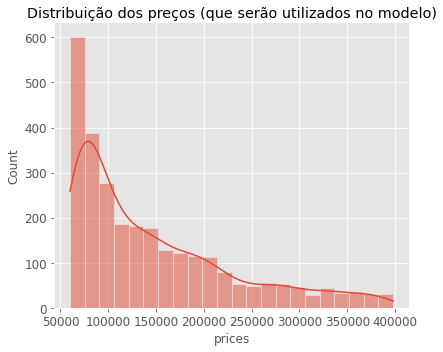

In [178]:
# Plotando um histograma para variável target
sns.displot(
    data = df, 
    x = 'prices',
    kind = 'hist',
    kde = True,
    aspect = 1.2)
plt.title('Distribuição dos preços (que serão utilizados no modelo)')
plt.tight_layout()
plt.savefig( os.path.join(IMGS_DIR, 'distribuition_target.png') )
plt.show()
plt.close() 


Aqui vemos que a variável target "prices" não é normalizada.

In [179]:
# This will turn all the string values into category values 
for label , content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label]= content.astype("category").cat.as_ordered()

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2821 entries, 0 to 3650
Data columns (total 62 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   oem                                        2821 non-null   category
 1   version                                    2821 non-null   category
 2   segment                                    2821 non-null   category
 3   size                                       2821 non-null   category
 4   mass_in_running_order(kg)                  2821 non-null   float64 
 5   distance_between_axles                     2821 non-null   float64 
 6   area(m²)                                   2821 non-null   float64 
 7   conpet_novo                                2821 non-null   float64 
 8   fuel_type                                  2821 non-null   category
 9   engine_type                                2821 non-null   category
 10  direct_injec

In [181]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

mass_in_running_order(kg)
distance_between_axles
area(m²)
conpet_novo
direct_injection
displacement(cm³)
power(cv)
cylinder_number
turbo
ebd_(abs)
traction_control
lane_change_blink
front_airbags
emergency_lightning
electronic_stability_control
blind_spot_monitoring
fatigue_detection
collision_mitigation_braking_system
forward_collision_warning
lane_departure
lane_keep_assist
adaptive_high_beam
cruise_control
adaptive_cruise_control
buckle_unlock_indicator_(passenger)
buckle_unlock_indicator_(pilot)
tpms
stop/start
gear_change_indicator
led_daytime_running_lights
led_backlight
hidraulic_steering
electric_steering
air_conditioning
automatic_air_conditioning
reverse_camera
auxiliary_parking_with_guides
rear_parking_sensors
front_and_rear_parking_sensors
parking_assistant
jam_assist
bluetooth_with_wireless_charging
hill_assist
downhill_assist
keyless_entry
start-stop_button
color_liquid_crystal_display_on_the_panel
entire_digital_and_configurable_cluster
audio_system_(as)
display_audio_(d

In [182]:
features_itens=  ['ebd_(abs)',
 'traction_control',
 'lane_change_blink',
 'front_airbags',
 'emergency_lightning',
 'electronic_stability_control',
 'blind_spot_monitoring',
 'fatigue_detection',
 'collision_mitigation_braking_system',
 'forward_collision_warning',
 'lane_departure',
 'lane_keep_assist',
 'adaptive_high_beam',
 'cruise_control',
 'adaptive_cruise_control',
 'buckle_unlock_indicator_(passenger)',
 'buckle_unlock_indicator_(pilot)',
 'tpms',
 'stop/start',
 'gear_change_indicator',
 'led_daytime_running_lights',
 'led_backlight',
 'hidraulic_steering',
 'electric_steering',
 'air_conditioning',
 'automatic_air_conditioning',
 'reverse_camera',
 'auxiliary_parking_with_guides',
 'rear_parking_sensors',
 'front_and_rear_parking_sensors',
 'parking_assistant',
 'jam_assist',
 'bluetooth_with_wireless_charging',
 'hill_assist',
 'downhill_assist',
 'keyless_entry',
 'start-stop_button',
 'color_liquid_crystal_display_on_the_panel',
 'entire_digital_and_configurable_cluster',
 'audio_system_(as)',
 'display_audio_(da)',
 'android_auto',
 'carplay_(apple)',
 'embedded_navigation_(nav)']

In [183]:

features_specs = [
 'mass_in_running_order(kg)',
 'distance_between_axles',
 'area(m²)',
 'conpet_novo',
 'fuel_type',
 'engine_type',
 'direct_injection',
 'displacement(cm³)',
 'power(cv)',
 'transmission_type',
 'cylinder_number',
 'turbo']

### Separando as features em numéricas e categóricas
***

In [184]:
#! Separando o conjunto de dados em train/test
#! 

X = df.drop('prices', axis= 1)
y = df['prices']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [185]:
version_train = X_train['version']
version_test = X_test['version']
X_train = X_train.drop('version', axis = 1)
X_test  = X_test.drop('version', axis = 1)

In [186]:
df = df.drop(['version','total_itens'], axis = 1)

def split_type_features(df, target):
    """
        Esta função recebe como argumentos df (dataframe) e target      (variável dependente) e retorna uma tupla com a lista de features     numéricas e categóricas.
    """

    numeric_features = df.drop(target, axis = 1).select_dtypes(include=['int64', 'float64']).columns

    categorical_features = df.select_dtypes(exclude=['number']).columns

    return numeric_features, categorical_features

In [187]:
# Aqui para utilizar a função que separa as features temos que desempacotar o retorno da função.
num_features, cat_features = split_type_features(df = df, target='prices')


In [188]:
display(num_features)

Index(['mass_in_running_order(kg)', 'distance_between_axles', 'area(m²)',
       'conpet_novo', 'direct_injection', 'displacement(cm³)', 'power(cv)',
       'cylinder_number', 'turbo', 'ebd_(abs)', 'traction_control',
       'lane_change_blink', 'front_airbags', 'emergency_lightning',
       'electronic_stability_control', 'blind_spot_monitoring',
       'fatigue_detection', 'collision_mitigation_braking_system',
       'forward_collision_warning', 'lane_departure', 'lane_keep_assist',
       'adaptive_high_beam', 'cruise_control', 'adaptive_cruise_control',
       'buckle_unlock_indicator_(passenger)',
       'buckle_unlock_indicator_(pilot)', 'tpms', 'stop/start',
       'gear_change_indicator', 'led_daytime_running_lights', 'led_backlight',
       'hidraulic_steering', 'electric_steering', 'air_conditioning',
       'automatic_air_conditioning', 'reverse_camera',
       'auxiliary_parking_with_guides', 'rear_parking_sensors',
       'front_and_rear_parking_sensors', 'parking_assista

In [189]:
display(cat_features)

Index(['oem', 'segment', 'size', 'fuel_type', 'engine_type',
       'transmission_type'],
      dtype='object')

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2821 entries, 0 to 3650
Data columns (total 60 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   oem                                        2821 non-null   category
 1   segment                                    2821 non-null   category
 2   size                                       2821 non-null   category
 3   mass_in_running_order(kg)                  2821 non-null   float64 
 4   distance_between_axles                     2821 non-null   float64 
 5   area(m²)                                   2821 non-null   float64 
 6   conpet_novo                                2821 non-null   float64 
 7   fuel_type                                  2821 non-null   category
 8   engine_type                                2821 non-null   category
 9   direct_injection                           2821 non-null   int64   
 10  displacement

In [191]:
from sklearn.base import BaseEstimator, TransformerMixin

#Custom Transformer Class

class SumUpItens(BaseEstimator, TransformerMixin):
     def __init__(self, soma_itens = True): # sem *args ou **kargs
         self.soma_itens = soma_itens
     def fit(self, X, y=None):
          return self
     def transform(self, X, y = None):
          X['total_itens'] = X.iloc[:, 15:58].sum(axis = 1)
          X=pd.DataFrame(X.loc[:, 'total_itens'])
          return X.values

In [192]:
display(X_train.shape, len(y_train))
display(X_test.shape, len(y_test))

(2256, 60)

2256

(565, 60)

565

In [193]:
# Pipeline de processamento
#
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
    
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

total_itens_input = features_itens
total_itens_transformer =  Pipeline(steps = [
    ('total_itens', SumUpItens())
])



In [194]:
# Preprocessamento
#
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features),
        ("new", total_itens_transformer, total_itens_input)])

In [195]:
def quick_eval(preprocessor, *args, verbose = True):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    training_score = model.score(X_train, y_train)
    testing_score = r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(MSE)
    if verbose:
        print(f"Regression algorithm: {model.named_steps['regressor'].__class__.__name__}")
        print(f"Train R2 = {training_score:.3f}, Test R2 = {testing_score:.3f}")
        print(f"MSE: {MSE:.2f}, RMSE = {rmse:.2f}")
        print("---***---")
   
    
    return model.named_steps['regressor']

In [196]:
regressors = [
    LinearRegression(),
    Lasso(alpha=.5),
    Ridge(alpha=.1),
    ElasticNet(alpha = 0.1, l1_ratio = 0.5),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    xgb.XGBRegressor(objective="reg:squarederror")
    ]

In [197]:
for r in regressors:
        model = Pipeline(steps = [
            ('preprocessor', preprocessor),
            ('regressor', r)
        ])
        quick_eval(preprocessor, X_train, y_train, X_test, y_test, verbose = True)

Regression algorithm: LinearRegression
Train R2 = 0.943, Test R2 = 0.940
MSE: 392137645.12, RMSE = 19802.47
---***---
Regression algorithm: Lasso
Train R2 = 0.943, Test R2 = 0.940
MSE: 392119846.26, RMSE = 19802.02
---***---
Regression algorithm: Ridge
Train R2 = 0.943, Test R2 = 0.940
MSE: 392185843.28, RMSE = 19803.68
---***---
Regression algorithm: ElasticNet
Train R2 = 0.903, Test R2 = 0.884
MSE: 765877369.93, RMSE = 27674.49
---***---
Regression algorithm: DecisionTreeRegressor
Train R2 = 0.997, Test R2 = 0.939
MSE: 400111935.98, RMSE = 20002.80
---***---
Regression algorithm: RandomForestRegressor
Train R2 = 0.993, Test R2 = 0.961
MSE: 254782621.35, RMSE = 15961.91
---***---
Regression algorithm: AdaBoostRegressor
Train R2 = 0.884, Test R2 = 0.845
MSE: 1019436616.53, RMSE = 31928.62
---***---
Regression algorithm: GradientBoostingRegressor
Train R2 = 0.966, Test R2 = 0.938
MSE: 409351078.38, RMSE = 20232.43
---***---
Regression algorithm: XGBRegressor
Train R2 = 0.996, Test R2 = 

**Dos resultados acima, temos que o estimador que apresentou as melhores métricas para o problema estudo é o XGBRegressor**

In [198]:
# Modelo baseline utilizando o XGboost
# 
xgb_reg_baseline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb_reg', xgb.XGBRegressor(booster='gbtree', 
                                         colsample_bytree = 0.3,
                                         learning_rate=0.3, 
                                         max_depth=6,
                                         n_estimators=1000, 
                                         random_state=42,
                                         reg_alpha=1, 
                                         reg_lambda=1,
                                         subsample=0.7))
])
xgb_reg_baseline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['mass_in_running_order(kg)', 'distance_between_axles', 'area(m²)',
       'conpet_novo', 'direct_injection', 'displacement(cm³)', 'power(cv)',
       'cylinder_number', 'turbo', 'ebd_(abs)', 'traction_cont...
                              colsample_bytree=0.3, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.3,
                              max_delta_step=0, max_depth=6, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
                              random_state=42, reg_alpha=1, reg_lambda=1,
                              scale_pos_weight=1, subsample=0.7,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [199]:
xgb_reg_baseline.named_steps

{'preprocessor': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('scaler', StandardScaler())]),
                                  Index(['mass_in_running_order(kg)', 'distance_between_axles', 'area(m²)',
        'conpet_novo', 'direct_injection', 'displacement(cm³)', 'power(cv)',
        'cylinder_number', 'turbo', 'ebd_(abs)', 'traction_control',
        'lane_change_blink', 'front_...
                                   'buckle_unlock_indicator_(passenger)',
                                   'buckle_unlock_indicator_(pilot)', 'tpms',
                                   'stop/start', 'gear_change_indicator',
                                   'led_daytime_running_lights', 'led_backlight',
                                   'hidraulic_steering', 'electric_steering',
                                 

In [200]:
def predict_dataframe(model_name):


    # Dataframe de predição 
    #
    y_pred = model_name.predict(X_test)
    residuals = y_test - y_pred
    df_pred_actual = pd.DataFrame({
    'oem'                : X_test['oem'],          # fabricante
    'segment'            : X_test['segment'],      # segmento 
    'version'            : version_test,           # versão
    'predicted'          : np.round(y_pred, 3),    # preço estimado
    'actual'             : np.round(y_test, 3),    # preço real
    'residuals'          : np.round(residuals, 3)  # diferença
})
    return df_pred_actual.reset_index(drop=True)

In [201]:
df_pred_actual = predict_dataframe(xgb_reg_baseline)
df_pred_actual

,oem,segment,version,predicted,actual,residuals
0,SUZUKI,SUV,I/SUZUKI SX4 SCROSS GLS,113153,103436,-9716
1,FORD,PICKUP MID-SIZE,I/FORD RANGER XLSCD4A22C,166262,138946,-27316
2,JEEP,SUV,JEEP/COMPASS LONGITUDE F,142074,137458,-4615
3,TROLLER,SUV,TROLLER/T4 XLT 3.2,141609,149862,8252
4,NISSAN,HATCHBACK,NISSAN/MARCH 16SL CVT,68973,68269,-705
5,VW,SUV,VW/T CROSS SENSE TSI AD,82513,70606,-11907
6,SUBARU,SEDAN,I/SUBARU WRX 2.0,201390,202807,1417
7,VW,PICKUP CAR DERIVED,VW/NOVA SAVEIRO RB MBVD,65623,66960,1338
8,HYUNDAI,SUV,HYUNDAI/CRETA 20A PRESTI,111902,111618,-284
9,LIFAN,SUV,I/LIFAN X80 IT VIP,284569,143319,-141250


In [202]:
def color_above_12k_red(value):
    if type(value) == type(''):
        return 'color:white'
    else:
        color = 'red' if (value >= 12000 or value <= -12000) else 'white'
        return 'color: {}'.format(color)

In [203]:
y_pred = xgb_reg_baseline.predict(X_test)
residuals = y_test - y_pred
df_residuos = pd.DataFrame({
    'oem'                : X_test['oem'],                      # fabricante
    'version'            : version_test,                       # versão              
    'segment'            : X_test['segment'],                  # segmento
    'erro(R$)'           : np.round(residuals, 1)              # diferença
})

In [204]:
pd.set_option('max_rows', 600)
pd.set_option('precision', 1)

In [205]:
df_residuos.reset_index(drop=True).style.applymap(color_above_12k_red).hide_index()

oem,version,segment,erro(R$)
SUZUKI,I/SUZUKI SX4 SCROSS GLS,SUV,-9716.3
FORD,I/FORD RANGER XLSCD4A22C,PICKUP MID-SIZE,-27316.4
JEEP,JEEP/COMPASS LONGITUDE F,SUV,-4615.2
TROLLER,TROLLER/T4 XLT 3.2,SUV,8252.3
NISSAN,NISSAN/MARCH 16SL CVT,HATCHBACK,-704.5
VW,VW/T CROSS SENSE TSI AD,SUV,-11906.6
SUBARU,I/SUBARU WRX 2.0,SEDAN,1416.8
VW,VW/NOVA SAVEIRO RB MBVD,PICKUP CAR DERIVED,1337.8
HYUNDAI,HYUNDAI/CRETA 20A PRESTI,SUV,-283.9
LIFAN,I/LIFAN X80 IT VIP,SUV,-141249.8


In [206]:
def RMSE(y_test, y_pred):
    """
    Calculates Root Mean Squared Error between the actual and the predicted labels.
    
    """
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    return RMSE


# Função para calcular as métricas do modelo
#
def show_scores(model, name):

    k = X.shape[1]
    n = len(y)
    y_pred = model.predict(X_test)
    

    # explained variance score
    evars = explained_variance_score(y_test, y_pred)
    # maximum residual error
    max_erro = max_error(y_test, y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
   
    r2_training = model.score(X_train, y_train)
    r2_true = r2_score(y_test, y_pred)
    # r2 score ajustado para o número de features
    #  é a única métrica aqui que considera o problema de overfitting 
    r2_adjusted = 1 - ( (1 - r2_true) * (n - 1)/ (n - k - 1) )
    rmse = RMSE(y_test, y_pred)
    # mean absolute percentual error
    mape = np.mean( np.abs( (y_test - y_pred) / y_test ) ) * 100
     
    scores = {
        "model name" : name, 
        "R2_score(training data)" : np.round(r2_training, 3),
        "R2_score(test data)" : np.round(r2_true, 3),
        "R2_adjusted" : np.round(r2_adjusted, 3),
        "Explained Variance Score" : np.round(evars, 3),
        "Maximum Residual Error" : np.round(max_erro, 3),
        "Mean Square Error" : np.round(mse, 3),
        "Root Mean Square Error" : np.round(rmse, 3),
        "Mean Absolute Percentual Error(%)" : np.round(mape, 3)
    }
    metricas = pd.Series(scores)
    return metricas

In [207]:
def plot_predicted_values_distribution():
    
    fig, ax = plt.subplots()
    sns.kdeplot(
    data = y_test,
    color = 'b',
    shade = True,
    label = 'true values', 
    ax = ax)

    sns.kdeplot(
    data = df_pred_actual['predicted'],
    color = 'red',
    shade = True,
    label = 'predicted values',
    ax = ax)
    
    ax.legend()
    ax.set(title = "Distribuição dos preços estimados x preços reais", xlabel = "preços(R$)")
    plt.tight_layout()
    plt.savefig( os.path.join(IMGS_DIR, 'prediction_true_distribution_tunned.png') )
    plt.show()
    plt.close() 

In [208]:
def scatter_prediction_actual_plot(model_name, X_test, y_test):

    y_pred = model_name.predict(X_test)

    fig, ax = plt.subplots()
    plt.scatter(y_test, y_pred, alpha=0.5, color = 'b')
    ax.set_xlabel('Preço(real)')
    ax.set_ylabel("Preço(estimado)")
    plt.title("Preços reais x Preços estimados - modelo final")
    plt.plot(y_test, y_test, color = 'red')
    plt.savefig( os.path.join(IMGS_DIR, 'prediction_true_scatter.png') )
    plt.show()
    plt.close() 


model name                           XGboost baseline Regression
R2_score(training data)                                        1
R2_score(test data)                                            1
R2_adjusted                                                    1
Explained Variance Score                                       1
Maximum Residual Error                                    141250
Mean Square Error                                      258716635
Root Mean Square Error                                     16085
Mean Absolute Percentual Error(%)                              6
dtype: object

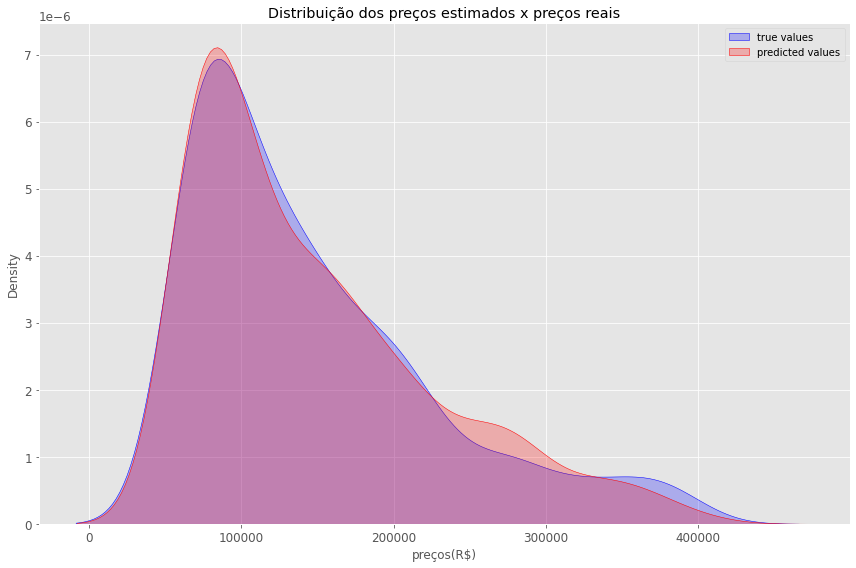

In [209]:
display(show_scores(model=xgb_reg_baseline, name = 'XGboost baseline Regression'))
print("")
plot_predicted_values_distribution()

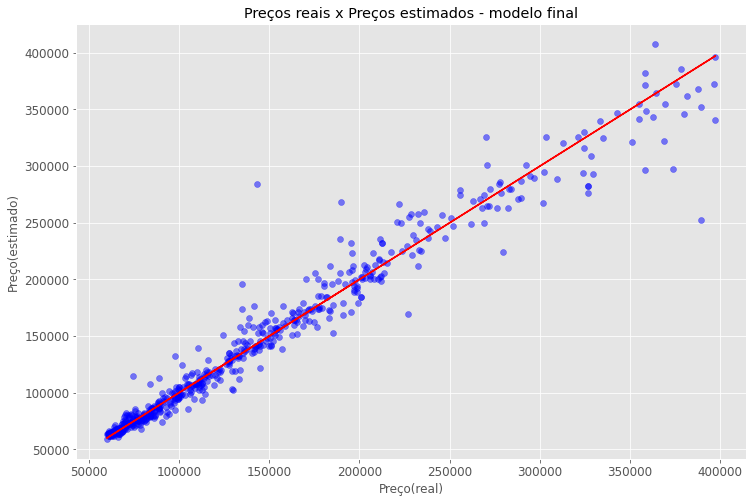

In [210]:
scatter_prediction_actual_plot(xgb_reg_baseline, X_test, y_test)

In [211]:
from sklearn.model_selection import cross_val_score
def display_scores(model,X_train, y_train):


    scores = cross_val_score(model, 
                         X_train, 
                         y_train, 
                         scoring = 'neg_mean_squared_error',
                         cv = 10)

    model_rmse_scores = np.sqrt(-1*scores)
    SCORES_MODEL = model_rmse_scores
    print("Scores: ", SCORES_MODEL)
    print("Mean: ", SCORES_MODEL.mean())
    print("Standard deviation:", SCORES_MODEL.std())

In [212]:
#! Salving the model 
#
k = X.shape[1]
n = len(y)
y_pred = xgb_reg_baseline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2_true = r2_score(y_test, y_pred)
#  é a única métrica aqui que considera o problema de overfitting 
r2_adjusted = 1 - ( (1 - r2_true) * (n - 1)/ (n - k - 1) )
# mean absolute percentual error
mape = np.mean( np.abs( (y_test - y_pred) / y_test ) ) * 100

model_data = pd.Series({
    'features' : X.columns.tolist(),
    'model'    : xgb_reg_baseline,
    'score'    : r2_true,
    'r2_adjusted': r2_adjusted,
    'RMSE'     : rmse,
    'MAPE'     : mape,
})

model_data.to_pickle( os.path.join( MODELS_DIR, 'xgb_basemodel.pkl' ) )

## Tunning model - grid search 
***

In [213]:
# The estimator that will be used for tunning
#
xgb_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb_reg', xgb.XGBRegressor(
                                objective="reg:squarederror", 
                                seed=42))
])
xgb_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['mass_in_running_order(kg)', 'distance_between_axles', 'area(m²)',
       'conpet_novo', 'direct_injection', 'displacement(cm³)', 'power(cv)',
       'cylinder_number', 'turbo', 'ebd_(abs)', 'traction_cont...
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, random_state=42,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              seed=42, subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [214]:
metricas = ["explained_variance",
            "neg_mean_squared_error",
            "r2"]

In [215]:
# Cross validate xgboost model
cross_validate(
    xgb_reg, X, y,
    return_train_score=False,
    scoring = metricas
)

{'fit_time': array([3.98316836, 2.76846743, 2.36301637, 2.26295352, 3.04361606]),
 'score_time': array([0.07561135, 0.07539463, 0.09010243, 0.08279419, 0.07395267]),
 'test_explained_variance': array([0.84361186, 0.81055678, 0.83251582, 0.85732301, 0.77800464]),
 'test_neg_mean_squared_error': array([-1.39102151e+09, -8.36463231e+08, -1.97538354e+09, -4.71395890e+08,
        -1.35472004e+09]),
 'test_r2': array([0.83308412, 0.78092005, 0.79915576, 0.85719099, 0.77799479])}

In [216]:
#! Grid Parameters
# 
grid_search = {
    'xgb_reg__colsample_bytree' : [0.4],
    'xgb_reg__learning_rate' : [0.015],
    'xgb_reg__max_depth' : [10],
    'xgb_reg__reg_alpha' : [0],
    'xgb_reg__gamma' : [10],
    'xgb_reg__reg_lambda' : [10],
    'xgb_reg__n_estimators' : [2000],
    'xgb_reg__subsample' : [0.9],
    'xgb_reg__min_child_weight' : [0.3]
}

In [217]:
kfold = KFold(n_splits = 20, shuffle = True, random_state = 2021)

xgb_tunado = GridSearchCV(
    xgb_reg,
    param_grid= grid_search,
    scoring = metricas,
    refit = "neg_mean_squared_error",
    return_train_score = True,
    verbose = 1,
    cv = kfold,
    n_jobs=-1
)

In [218]:
print("********The tunning fit process just started********")
print("...waiting a little bit long !!!!!!")
xgb_tunado.fit(X_train, y_train)

********The tunning fit process just started********
...waiting a little bit long !!!!!!
Fitting 20 folds for each of 1 candidates, totalling 20 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 11.0min finished


GridSearchCV(cv=KFold(n_splits=20, random_state=2021, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['mass_in_running_order(kg)', 'distance_between_axles', 'area(m²)',
       'conpet_novo', 'direct_injection', 'displac...
                         'xgb_reg__gamma': [10],
                         'xgb_reg__learning_rate': [0.015],
                         'xgb_reg__max_depth': [10],
                         'xgb_reg__min_child_weight': [0.3],
                         'xgb_reg__n_estimators': [2000],
                         'xgb_reg__reg_alpha': [0], 'xgb_reg__reg_lambda': [10],
                         'xgb_reg__subsample': [0.9]},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring=['explained_variance', 'neg_mean_squared_error', 'r2'],
             verbose=1)

In [219]:
#! Print the best parameters and best estimator
#!
print("Best parameters found: \n", xgb_tunado.best_params_)
print("")
print("Best estimator found: \n", xgb_tunado.best_estimator_)

Best parameters found: 
 {'xgb_reg__colsample_bytree': 0.4, 'xgb_reg__gamma': 10, 'xgb_reg__learning_rate': 0.015, 'xgb_reg__max_depth': 10, 'xgb_reg__min_child_weight': 0.3, 'xgb_reg__n_estimators': 2000, 'xgb_reg__reg_alpha': 0, 'xgb_reg__reg_lambda': 10, 'xgb_reg__subsample': 0.9}

Best estimator found: 
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['mass_in_running_order(kg)', 'distance_between_axles', 'area(m²)',
       'conpet_novo', 'direct_injection', 'displacement(cm³)', 'power(cv)',
       'cylinder_number', 'turbo', 'ebd_(abs)', 'tracti

In [220]:
display(show_scores(model=xgb_tunado, name = 'XGboost baseline Regression'))

model name                           XGboost baseline Regression
R2_score(training data)                                -27265708
R2_score(test data)                                            1
R2_adjusted                                                    1
Explained Variance Score                                       1
Maximum Residual Error                                    123011
Mean Square Error                                      217821383
Root Mean Square Error                                     14759
Mean Absolute Percentual Error(%)                              5
dtype: object

In [221]:
df_pred_actual = predict_dataframe(xgb_tunado)
df_pred_actual

,oem,segment,version,predicted,actual,residuals
0,SUZUKI,SUV,I/SUZUKI SX4 SCROSS GLS,110912,103436,-7475
1,FORD,PICKUP MID-SIZE,I/FORD RANGER XLSCD4A22C,164357,138946,-25411
2,JEEP,SUV,JEEP/COMPASS LONGITUDE F,141743,137458,-4285
3,TROLLER,SUV,TROLLER/T4 XLT 3.2,144016,149862,5846
4,NISSAN,HATCHBACK,NISSAN/MARCH 16SL CVT,67784,68269,484
5,VW,SUV,VW/T CROSS SENSE TSI AD,78165,70606,-7560
6,SUBARU,SEDAN,I/SUBARU WRX 2.0,201611,202807,1196
7,VW,PICKUP CAR DERIVED,VW/NOVA SAVEIRO RB MBVD,65878,66960,1082
8,HYUNDAI,SUV,HYUNDAI/CRETA 20A PRESTI,111129,111618,489
9,LIFAN,SUV,I/LIFAN X80 IT VIP,266309,143319,-122990


In [222]:
df_pred_actual['rank'] = df_pred_actual.index +1

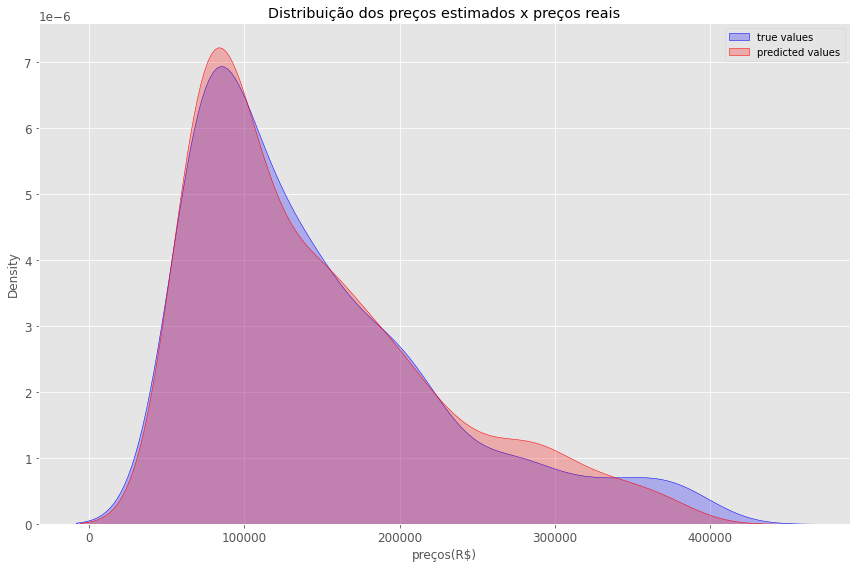

In [223]:
plot_predicted_values_distribution()

In [224]:
y_pred = xgb_tunado.predict(X_test)
residuals = y_test - y_pred
df_residuos = pd.DataFrame({
    'oem'                : X_test['oem'],                      # fabricante
    'version'            : version_test,                       # versão              
    'segment'            : X_test['segment'],                  # segmento
    'erro(R$)'           : np.round(residuals, 1)              # diferença
})

In [225]:
df_residuos.reset_index(drop=True).sort_values(by = 'erro(R$)' ).style.applymap(color_above_12k_red).hide_index()

oem,version,segment,erro(R$)
LIFAN,I/LIFAN X80 IT VIP,SUV,-122989.8
FORD,I/FORD FUSION TITGTDIAWD,SEDAN,-51168.5
FORD,I/FORD FUSION SEL GTDI,SEDAN,-45972.1
CAOA,I/HYUNDAI SANTA FE 3.3,SUV,-43220.3
VW,I/VW PASSAT VAR. 2.0T,STATION-WAGON,-43177.8
JAGUAR,I/JAG EPACE P250 STD,SUV,-41668.0
FORD,I/FORD FUSION TITGTDIAWD,SEDAN,-37195.7
LAND ROVER,I/LR DISC SPT SI4 SE,SUV,-29901.9
FORD,I/FORD FUSION SEL GTDI,SEDAN,-29827.3
MINI,I/MINI COOPER S HATCH,HATCHBACK,-26032.0


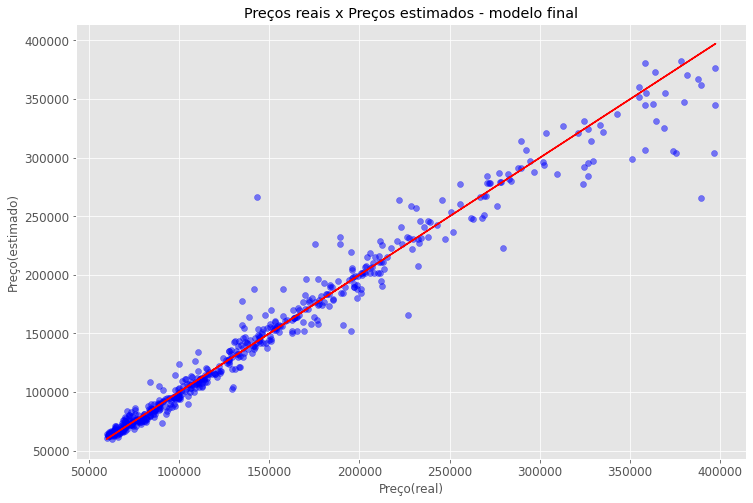

In [226]:
scatter_prediction_actual_plot(xgb_tunado, X_test, y_test)

In [227]:
#! Salving the model 
#
k = X.shape[1]
n = len(y)
y_pred = xgb_tunado.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2_true = r2_score(y_test, y_pred)
#  é a única métrica aqui que considera o problema de overfitting 
r2_adjusted = 1 - ( (1 - r2_true) * (n - 1)/ (n - k - 1) )
# mean absolute percentual error
mape = np.mean( np.abs( (y_test - y_pred) / y_test ) ) * 100

model_data = pd.Series({
    'features' : X.columns.tolist(),
    'model'    : xgb_reg,
    'score'    : r2_true,
    'r2_adjusted': r2_adjusted,
    'RMSE'     : rmse,
    'MAPE'     : mape,
})

model_data.to_pickle( os.path.join( MODELS_DIR, 'xgb_model_tunado.pkl' ) )

## Dados para validação do modelo
***

In [228]:
validation_data = "cars_validation_data.csv"
validation_data_path= os.path.join(DATA_DIR, validation_data)
df = pd.read_csv(validation_data_path, index_col=0)
df.shape

(214, 62)

In [229]:
df.head()

,oem,version,segment,size,mass_in_running_order(kg),distance_between_axles,area(m²),conpet_novo,fuel_type,engine_type,direct_injection,displacement(cm³),power(cv),transmission_type,cylinder_number,turbo,ebd_(abs),traction_control,lane_change_blink,front_airbags,emergency_lightning,electronic_stability_control,blind_spot_monitoring,fatigue_detection,collision_mitigation_braking_system,forward_collision_warning,lane_departure,lane_keep_assist,adaptive_high_beam,cruise_control,adaptive_cruise_control,buckle_unlock_indicator_(passenger),buckle_unlock_indicator_(pilot),tpms,stop/start,gear_change_indicator,led_daytime_running_lights,led_backlight,hidraulic_steering,electric_steering,air_conditioning,automatic_air_conditioning,reverse_camera,auxiliary_parking_with_guides,rear_parking_sensors,front_and_rear_parking_sensors,parking_assistant,jam_assist,bluetooth_with_wireless_charging,hill_assist,downhill_assist,keyless_entry,start-stop_button,color_liquid_crystal_display_on_the_panel,entire_digital_and_configurable_cluster,audio_system_(as),display_audio_(da),android_auto,carplay_(apple),embedded_navigation_(nav),prices,total_itens
0,AUDI,AUDI/Q3 1.4TFSI,SUV,LARGE,1405,2603,8,2,FLEX,COMBUSTION,1,1,150,DUAL CLUTCH,4,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,1,1,1,1,0,0,1,0,1,1,1,0,0,1,0,0,0,188990,23
1,AUDI,AUDI/Q3 1.4TFSI,SUV,LARGE,1580,2680,8,2,GASOLINE,COMBUSTION,1,1,150,DUAL CLUTCH,4,1,1,1,1,1,1,1,0,0,1,1,0,0,0,1,1,1,1,1,1,0,1,1,0,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,209990,32
2,BMW,BMW/X1 S201 ACTIVEFLEX,SUV,LARGE,1560,2670,8,2,FLEX,COMBUSTION,1,2,192,AUTOMATIC,4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,0,0,1,0,1,1,1,0,0,0,0,1,1,216950,24
3,BMW,BMW/X1 S201 ACTIVEFLEX,SUV,LARGE,1560,2670,8,2,FLEX,COMBUSTION,1,2,192,AUTOMATIC,4,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1,249950,20
4,BMW,BMW/X1 X25I ACTIVEFLEX,SUV,LARGE,1655,2670,8,2,FLEX,COMBUSTION,1,2,231,AUTOMATIC,4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,0,0,1,0,1,1,1,0,0,0,0,1,1,235950,24


In [230]:
X_validation = df.drop(['prices', 'version'], axis= 1)
y_validation = df['prices']

In [231]:
X_validation.head()

,oem,segment,size,mass_in_running_order(kg),distance_between_axles,area(m²),conpet_novo,fuel_type,engine_type,direct_injection,displacement(cm³),power(cv),transmission_type,cylinder_number,turbo,ebd_(abs),traction_control,lane_change_blink,front_airbags,emergency_lightning,electronic_stability_control,blind_spot_monitoring,fatigue_detection,collision_mitigation_braking_system,forward_collision_warning,lane_departure,lane_keep_assist,adaptive_high_beam,cruise_control,adaptive_cruise_control,buckle_unlock_indicator_(passenger),buckle_unlock_indicator_(pilot),tpms,stop/start,gear_change_indicator,led_daytime_running_lights,led_backlight,hidraulic_steering,electric_steering,air_conditioning,automatic_air_conditioning,reverse_camera,auxiliary_parking_with_guides,rear_parking_sensors,front_and_rear_parking_sensors,parking_assistant,jam_assist,bluetooth_with_wireless_charging,hill_assist,downhill_assist,keyless_entry,start-stop_button,color_liquid_crystal_display_on_the_panel,entire_digital_and_configurable_cluster,audio_system_(as),display_audio_(da),android_auto,carplay_(apple),embedded_navigation_(nav),total_itens
0,AUDI,SUV,LARGE,1405,2603,8,2,FLEX,COMBUSTION,1,1,150,DUAL CLUTCH,4,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,1,1,1,1,0,0,1,0,1,1,1,0,0,1,0,0,0,23
1,AUDI,SUV,LARGE,1580,2680,8,2,GASOLINE,COMBUSTION,1,1,150,DUAL CLUTCH,4,1,1,1,1,1,1,1,0,0,1,1,0,0,0,1,1,1,1,1,1,0,1,1,0,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,32
2,BMW,SUV,LARGE,1560,2670,8,2,FLEX,COMBUSTION,1,2,192,AUTOMATIC,4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,0,0,1,0,1,1,1,0,0,0,0,1,1,24
3,BMW,SUV,LARGE,1560,2670,8,2,FLEX,COMBUSTION,1,2,192,AUTOMATIC,4,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1,20
4,BMW,SUV,LARGE,1655,2670,8,2,FLEX,COMBUSTION,1,2,231,AUTOMATIC,4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,0,0,1,0,1,1,1,0,0,0,0,1,1,24


In [232]:
# Dataframe de predição com o novo arquivo de validação
#
final_model = xgb_tunado
final_predictions = final_model.predict(X_validation)
residuals = y_validation - final_predictions
df_preds_valids = pd.DataFrame({
    'oem'                : df['oem'],                          # fabricante
    'segment'            : df['segment'],                      # segmento
    'version'            : df['version'],                      # versão  
    'valores estimados(R$)'  : np.round(final_predictions, 1), # predictions
    'valores reais(R$)'      : np.round(y_validation, 1),      # preço real
    'erro(R$)'               : np.round(residuals, 1)          # diferença
})
final_mse = mean_squared_error(y_validation, final_predictions)
final_rmse = np.sqrt(final_mse)
display(f"O valor final do erro médio - RMSE = {final_rmse:.1f}")

'O valor final do erro médio - RMSE = 12994.5'

In [233]:
df_preds_valids[['oem', 'segment', 'version', 'erro(R$)']].sort_values(by = 'erro(R$)' ).style.applymap(color_above_12k_red).hide_index()

oem,segment,version,erro(R$)
BMW,SUV,I/BMW X2 M35I,-117937.1
VW,SUV,I/VW TIGUAN ALLSPACE RL,-52680.2
LAND ROVER,SUV,LR/DISC SPT D180 SE RD,-31654.3
LAND ROVER,SUV,LR/DISC SPT P240FF HSE,-30992.3
LAND ROVER,SUV,LR/DISC SPT D240 HSE,-26597.1
LAND ROVER,SUV,LR/DISC SPT P250FF SE 7L,-24419.2
VOLVO,SUV,I/VOLVO XC60 T8 R-DESIGN,-21497.6
VOLVO,SUV,I/VOLVO XC60 T8 R-DESIGN,-21497.6
MITSUBISHI,SUV,MMC/ASX 2.0 AWD CVT,-19785.2
VOLVO,SUV,I/VOLVO XC60 T8 INSCRIPT,-18967.9


In [234]:
df_preds_valids.describe()

,valores estimados(R$),valores reais(R$),erro(R$)
count,214,214,214
mean,158862,154501,-4361
std,65174,61782,12270
min,73571,80990,-117937
25%,103263,100840,-8167
50%,141150,135090,-3280
75%,201219,195990,143
max,321448,299950,33375


In [235]:
df_preds_valids.head(10).style.set_properties(**{'background-color': 'black',                                                   
                                        'color'           : 'lawngreen',                       
                                        'border-color'    : 'white'})

,oem,segment,version,valores estimados(R$),valores reais(R$),erro(R$)
0,AUDI,SUV,AUDI/Q3 1.4TFSI,198457.7,188990,-9467.7
1,AUDI,SUV,AUDI/Q3 1.4TFSI,190257.6,209990,19732.4
2,BMW,SUV,BMW/X1 S201 ACTIVEFLEX,224315.5,216950,-7365.5
3,BMW,SUV,BMW/X1 S201 ACTIVEFLEX,249055.2,249950,894.8
4,BMW,SUV,BMW/X1 X25I ACTIVEFLEX,243323.3,235950,-7373.3
5,BMW,SUV,BMW/X1 X25I ACTIVEFLEX,258508.4,272950,14441.6
6,BMW,SUV,I/BMW X2 M35I,249887.2,131950,-117937.1
7,BMW,SUV,I/BMW X2 S18I ACTIVEFLEX,207666.2,191950,-15716.2
8,BMW,SUV,I/BMW X2 S18I ACTIVEFLEX,207666.2,215950,8283.8
9,BMW,SUV,I/BMW X2 S18I ACTIVEFLEX,207666.2,215950,8283.8


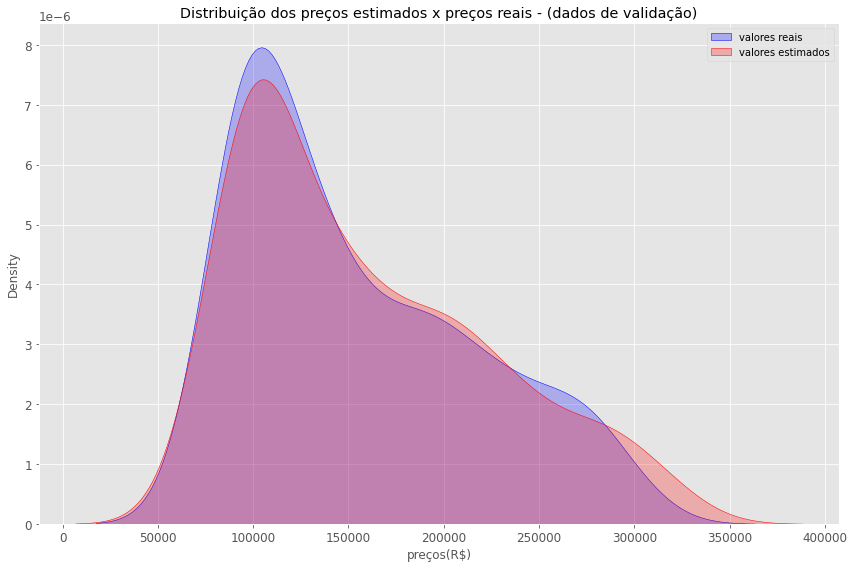

In [236]:
fig, ax = plt.subplots()
sns.kdeplot(
data = y_validation,
color = 'b',
shade = True,
label = 'valores reais', 
ax = ax)

sns.kdeplot(
data = df_preds_valids['valores estimados(R$)'],
color = 'red',
shade = True,
label = 'valores estimados',
ax = ax)
    
ax.legend()
ax.set(title = "Distribuição dos preços estimados x preços reais - (dados de validação)", xlabel = "preços(R$)")
plt.tight_layout()
plt.savefig( os.path.join(IMGS_DIR, 'prediction_true_distribution_validation.png') )
plt.show()
plt.close() 

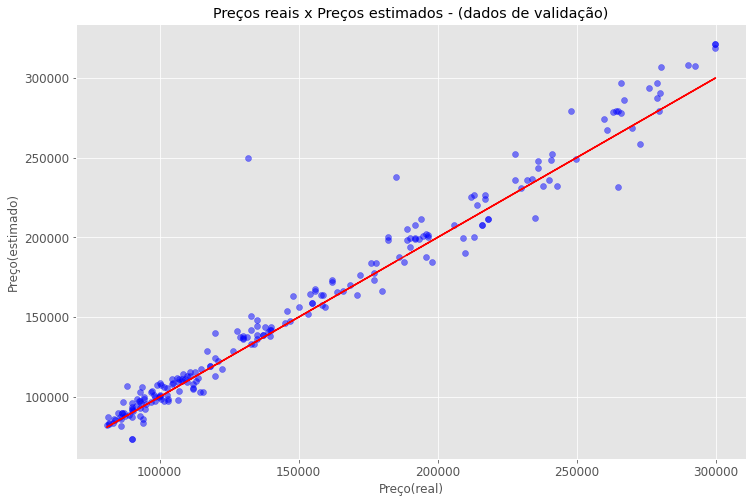

In [237]:
y_valids = xgb_tunado.predict(X_validation)

fig, ax = plt.subplots()
plt.scatter(y_validation, y_valids, alpha=0.5, color = 'b')
ax.set_xlabel('Preço(real)')
ax.set_ylabel("Preço(estimado)")
plt.title("Preços reais x Preços estimados - (dados de validação)")
plt.plot(y_validation, y_validation, color = 'red')
plt.savefig( os.path.join(IMGS_DIR, 'prediction_true_scatter_validation.png') )
plt.show()
plt.close() 